# Modelos de Regresión Lineal
## Modelo con Datos Simulados
* y = a + bx
* x: 100 valores distribuidos según una N(1.5, 2.5)
* Ye= 11 + 1.4*x + e
* e estará distribuida según una N(0,0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + (2.5*np.random.randn(100))

In [3]:
res = 0 + (0.8*np.random.randn(100))

In [4]:
y_pred = 11 + (1.4*x)

In [5]:
y_act = 11 + (1.4*x) + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
        {
            "x":x_list,
            "y_actual":y_act_list,
            "y_prediccion":y_pred_list
        }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,2.302851,13.020386,14.223991
1,4.404867,17.137126,17.166814
2,2.665442,15.079305,14.731618
3,5.278943,19.562613,18.390520
4,-1.466853,7.935260,8.946406


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

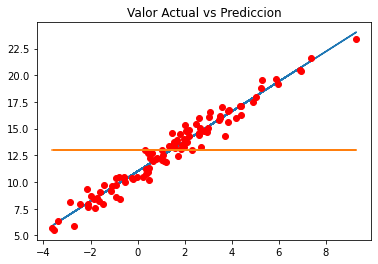

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean)
plt.title("Valor Actual vs Prediccion");

In [12]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.302851,13.020386,14.223991,1.576105,1.448666,0.002686
1,4.404867,17.137126,17.166814,17.625328,0.000881,17.376929
2,2.665442,15.079305,14.731618,3.108370,0.120886,4.455241
3,5.278943,19.562613,18.390520,29.397636,1.373801,43.481512
4,-1.466853,7.935260,8.946406,16.177735,1.022416,25.334121


## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [14]:
SSR =sum(data["SSR"])
SSD =sum(data["SSD"])
SST =sum(data["SST"])

In [15]:
SSR

1298.6547749966978

In [16]:
SSD

52.06923906625511

In [17]:
SST

1361.2893311230996

In [18]:
SSR+SSD

1350.7240140629528

In [19]:
R2 = SSR/SST

In [20]:
R2

0.9539887996663232

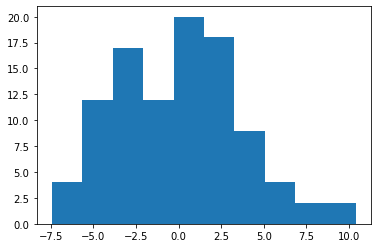

In [21]:
plt.hist(data["y_actual"]-np.mean(y_act));
#Errores se comportan como normal

## Obteniendo la recta de regresión

* y = a + b
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_n - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta*x_mean

In [26]:
alpha, beta

(10.997793542811852, 1.4056985296162294)

El modelo lineal obtenido por regresión es: y = 10.9861 + 1.3977 * x

In [27]:
data["y_model"] = alpha + beta *data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.302851,13.020386,14.223991,1.576105,1.448666,0.002686,0.046687,0.811560,14.234908
1,4.404867,17.137126,17.166814,17.625328,0.000881,17.376929,12.517710,9.017304,17.189709
2,2.665442,15.079305,14.731618,3.108370,0.120886,4.455241,2.666834,1.596323,14.744601
3,5.278943,19.562613,18.390520,29.397636,1.373801,43.481512,25.564861,15.030805,18.418396
4,-1.466853,7.935260,8.946406,16.177735,1.022416,25.334121,14.439724,8.230229,8.935840


In [29]:
SSR =sum((data["y_model"]-y_mean)**2)
SSD=sum((data["y_model"]-data["y_actual"])**2)
SST=sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(1309.2449521572435, 52.044378965855095, 1361.2893311231)

In [31]:
R2 = SSR/SST
R2

0.9617683193602065

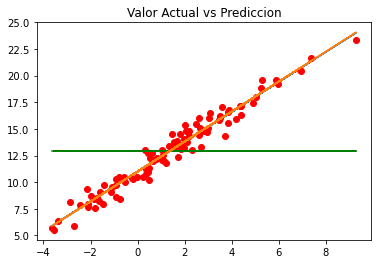

In [32]:
y_mean1 = [np.mean(y_act) for i in range(1,len(x_list)+1)]
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean1, "g")
plt.plot(x,data["y_model"])
plt.title("Valor Actual vs Prediccion");

## Error estandar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7287421296235845

In [34]:
y_mean

12.968561229701617

In [35]:
#Promedio de error
RSE/y_mean

0.05619298214473955